# Exploratory Data Analysis for Fraud Detection

This notebook performs exploratory data analysis on the fraud detection datasets:
1. Fraud_Data.csv - E-commerce transaction data
2. IpAddress_to_Country.csv - IP to country mapping
3. creditcard.csv - Bank transaction data

In [ ]:

import sys
import os
import pandas as pd

# Add the src directory to the path
if os.path.abspath('..') not in sys.path:
    sys.path.append(os.path.abspath('..'))

# Function to reload custom modules
%load_ext autoreload 
%autoreload 2

# Import custom load data and EDA module
from src.load_data import load_data
from src.eda import (
    display_basic_info, analyze_class_distribution,
    plot_numerical_distributions, analyze_categorical_features,
    analyze_time_patterns, analyze_correlation_matrix, analyze_ip_country_data
)

# Set pandas to display numbers in plain (not scientific) notation
pd.set_option('display.float_format', '{:.2f}'.format)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Load the Datasets

In [22]:
# Load the datasets using the function from eda.py
fraud_data = load_data('../data/raw/Fraud_Data.csv')
ip_country = load_data('../data/raw/IpAddress_to_Country.csv')
creditcard = load_data('../data/raw/creditcard.csv')

### 2. Explore Fraud_Data

In [23]:
# Display basic information about Fraud_Data.csv
print("---------------- Basic Information for Fraud Data --------------------")
display_basic_info(fraud_data, "Fraud_Data Data")

---------------- Basic Information for Fraud Data --------------------

Fraud_Data Data shape: (151112, 11)

Dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


None


First 5 rows:


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368.80,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387.87,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820.11,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3840542443.91,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117.45,0



Missing values:


,missing,total,percent
user_id,0,151112,0.00
signup_time,0,151112,0.00
purchase_time,0,151112,0.00
purchase_value,0,151112,0.00
device_id,0,151112,0.00
source,0,151112,0.00
browser,0,151112,0.00
sex,0,151112,0.00
age,0,151112,0.00
ip_address,0,151112,0.00



Summary statistics:


,user_id,purchase_value,age,ip_address,class
count,151112.00,151112.00,151112.00,151112.00,151112.00
mean,200171.04,36.94,33.14,2152145330.96,0.09
std,115369.29,18.32,8.62,1248497030.10,0.29
min,2.00,9.00,18.00,52093.50,0.00
25%,100642.50,22.00,27.00,1085933882.53,0.00
50%,199958.00,35.00,33.00,2154770162.41,0.00
75%,300054.00,49.00,39.00,3243257679.72,0.00
max,400000.00,154.00,76.00,4294850499.68,1.00


Fraud data class distribution 


Class distribution for class:


,class,count,percent,cumulative_count,cumulative_percent
0,0,136961,90.64,136961,90.64
1,1,14151,9.36,151112,100.00


Fraud rate: 9.36%


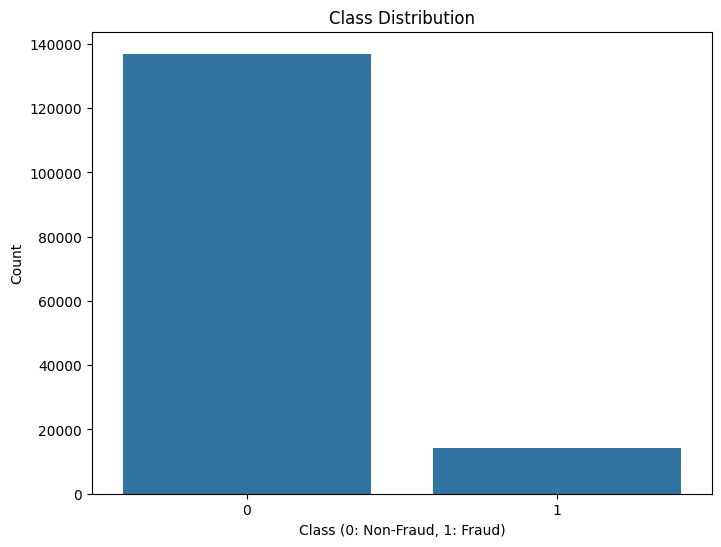

In [24]:
# Analyze class distribution of fraud data
analyze_class_distribution(fraud_data, class_col='class')

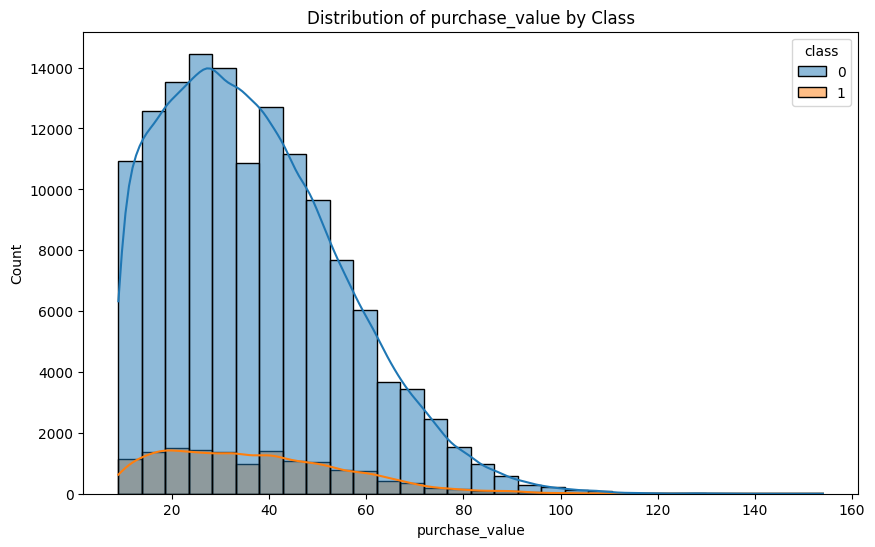

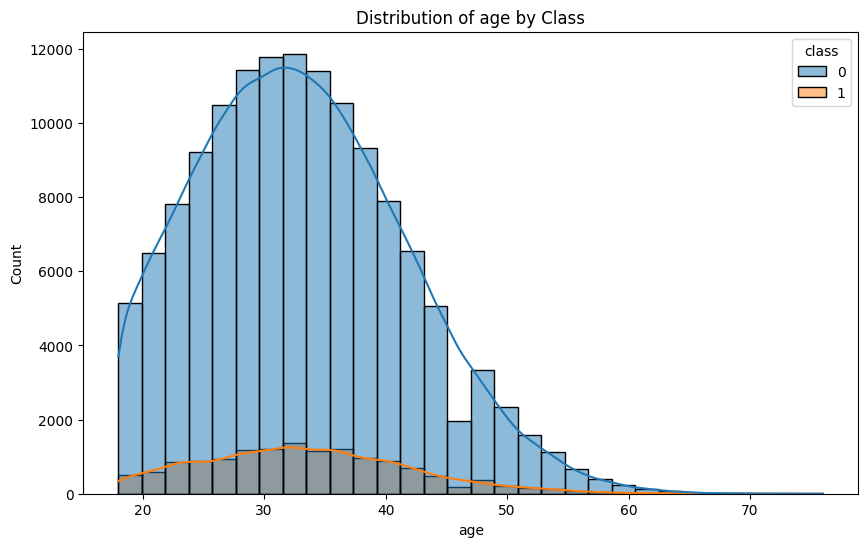

In [25]:
# Plot numerical distributions
numerical_cols = ['purchase_value', 'age']
plot_numerical_distributions(fraud_data, numerical_cols, class_col='class')


Value counts for source:


source
SEO       60615
Ads       59881
Direct    30616
Name: count, dtype: int64

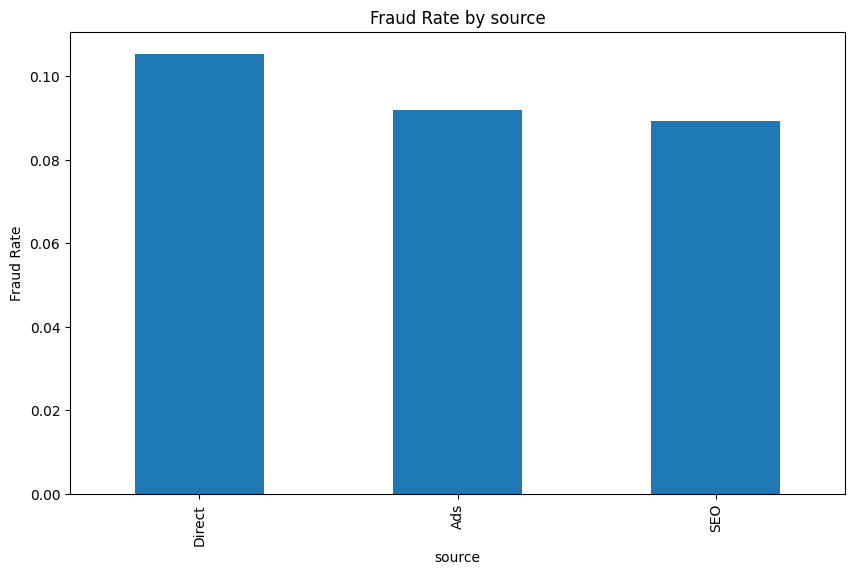

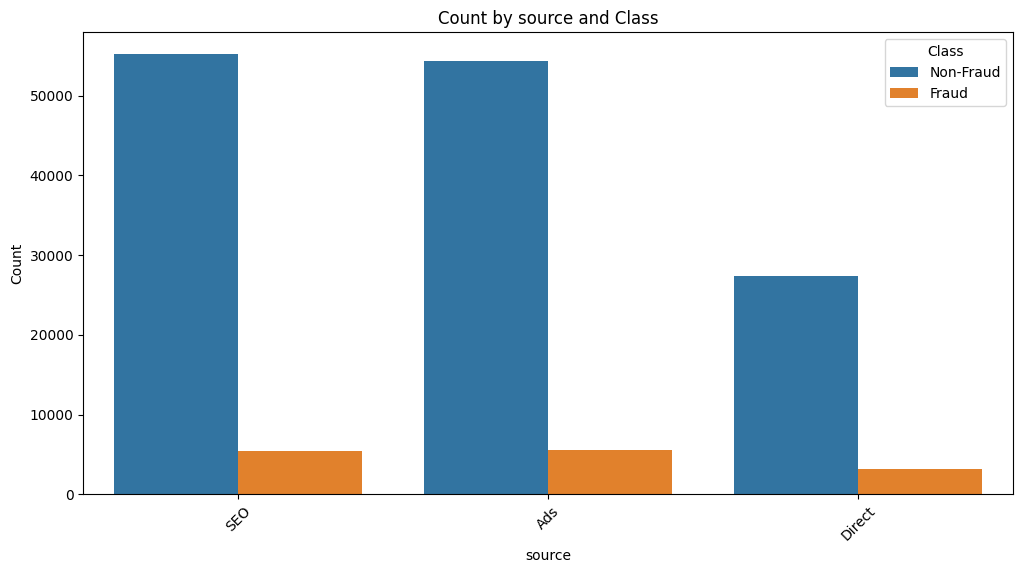


Value counts for browser:


browser
Chrome     61432
IE         36727
Safari     24667
FireFox    24610
Opera       3676
Name: count, dtype: int64

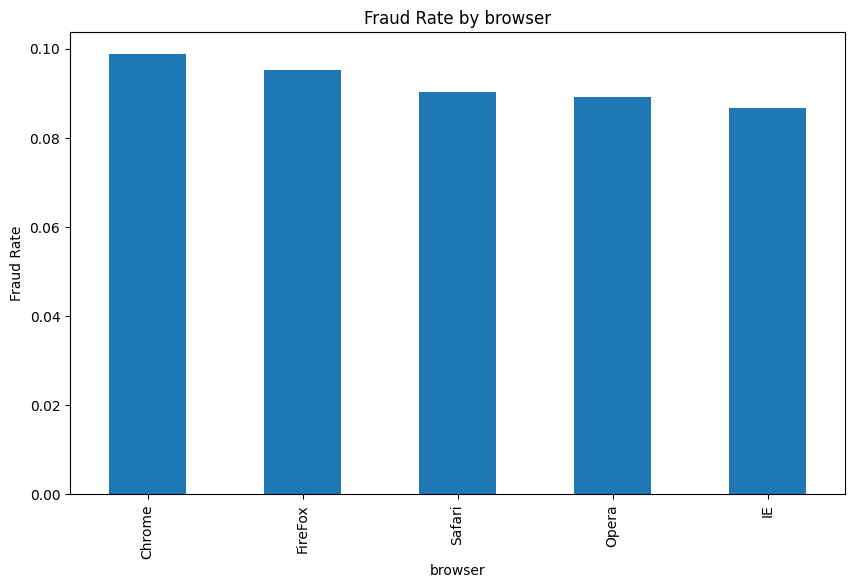

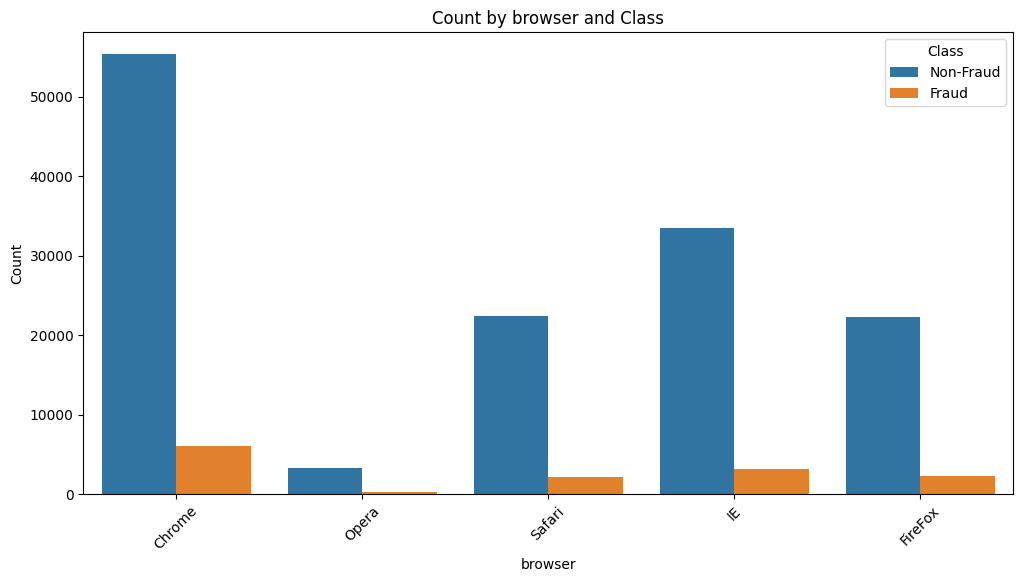


Value counts for sex:


sex
M    88293
F    62819
Name: count, dtype: int64

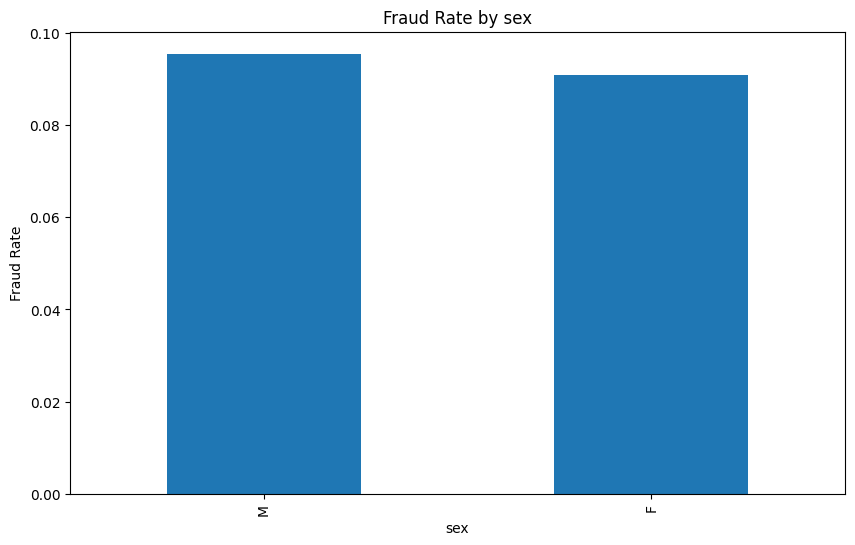

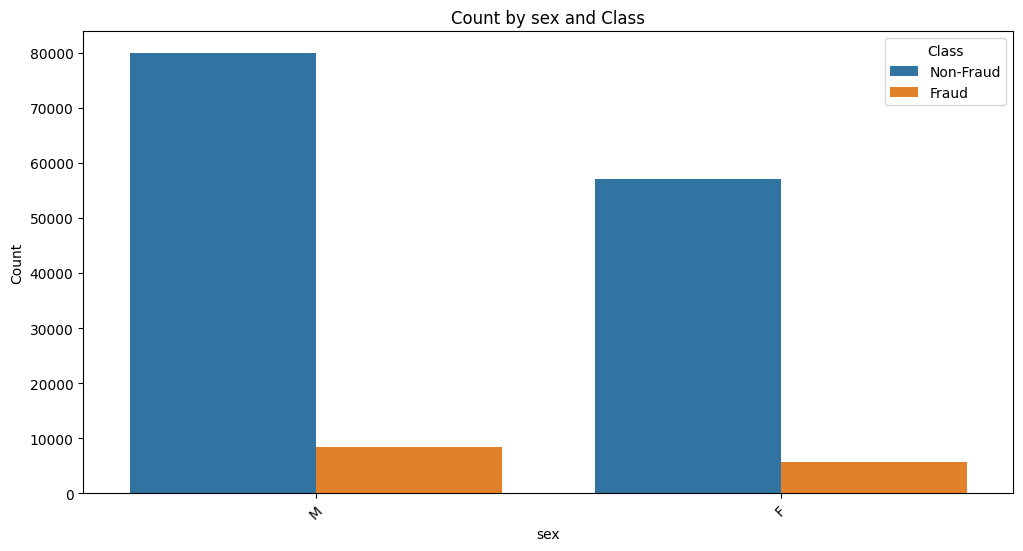

In [26]:
# Analyze categorical features
categorical_cols = ['source', 'browser', 'sex']
analyze_categorical_features(fraud_data, categorical_cols, class_col='class')

In [27]:
fraud_data.columns

Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class'],
      dtype='object')

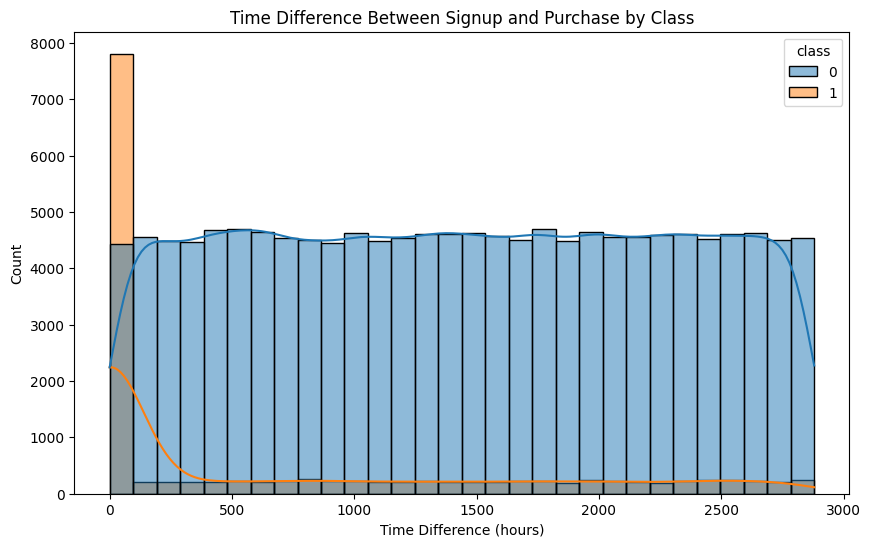

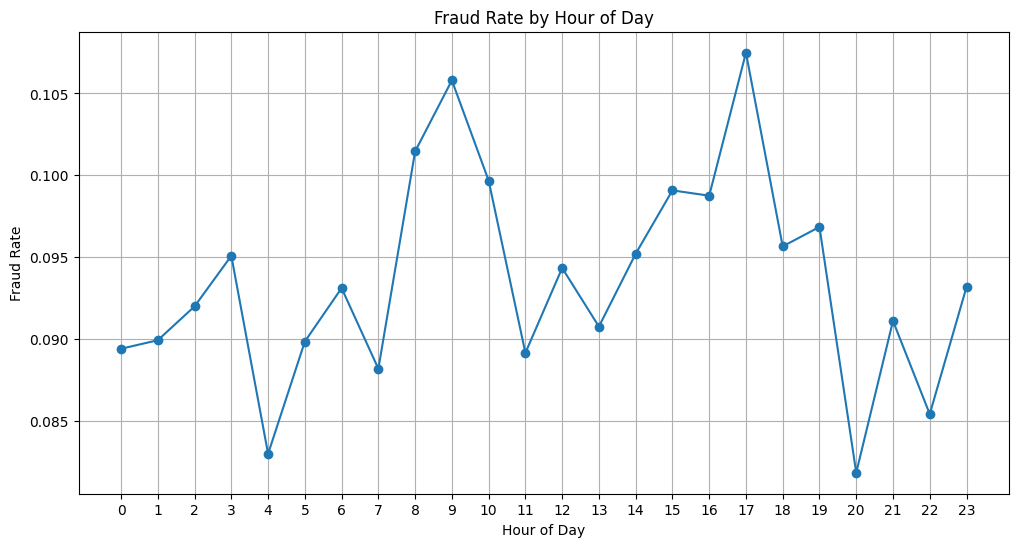

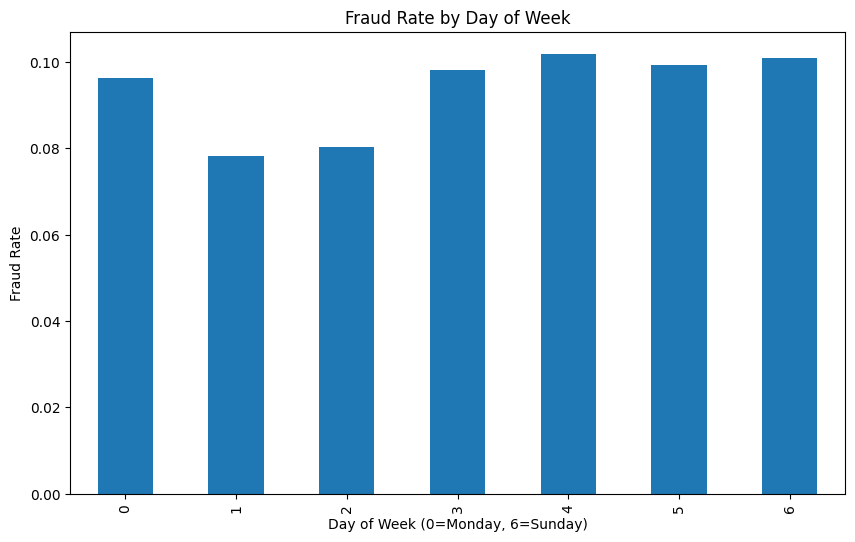

In [28]:
# Analyze time patterns
time_pattern = analyze_time_patterns(fraud_data)

## 3. Explore IpAddress_to_Country.csv

In [29]:
#load country data 
ip_country = load_data('../data/raw/IpAddress_to_Country.csv')

In [30]:
# Display basic information about IpAddress_to_Country.csv
display_basic_info(ip_country, "IpAddress_to_Country")


IpAddress_to_Country shape: (138846, 3)

Dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lower_bound_ip_address  138846 non-null  float64
 1   upper_bound_ip_address  138846 non-null  int64  
 2   country                 138846 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB


None


First 5 rows:


,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.00,16777471,Australia
1,16777472.00,16777727,China
2,16777728.00,16778239,China
3,16778240.00,16779263,Australia
4,16779264.00,16781311,China



Missing values:


,missing,total,percent
lower_bound_ip_address,0,138846,0.00
upper_bound_ip_address,0,138846,0.00
country,0,138846,0.00



Summary statistics:


,lower_bound_ip_address,upper_bound_ip_address
count,138846.00,138846.00
mean,2724531562.52,2724557062.22
std,897521519.71,897497915.46
min,16777216.00,16777471.00
25%,1919930368.00,1920008191.00
50%,3230887296.00,3230887551.00
75%,3350465280.00,3350465919.00
max,3758096128.00,3758096383.00


Number of unique countries: 235


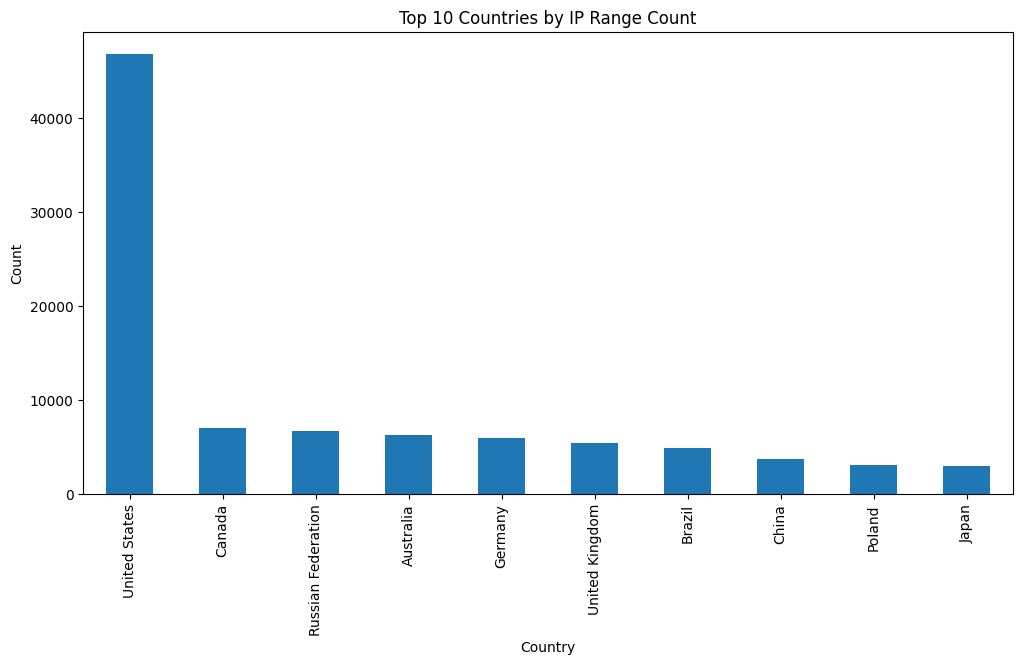

In [31]:
# Analyze IP to country mapping data
country_counts = analyze_ip_country_data(ip_country)

## 4. Explore creditcard.csv

In [32]:
#load creditcard dataset 
creditcard = load_data('../data/raw/creditcard.csv')

In [33]:
# Display basic information about creditcard.csv
display_basic_info(creditcard, "Creditcard Dataset")


Creditcard Dataset shape: (284807, 31)

Dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  floa

None


First 5 rows:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.00,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,...,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62,0
1,0.00,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,...,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69,0
2,1.00,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,...,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,378.66,0
3,1.00,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,...,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,123.50,0
4,2.00,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,...,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,69.99,0



Missing values:


,missing,total,percent
Time,0,284807,0.00
V1,0,284807,0.00
V2,0,284807,0.00
V3,0,284807,0.00
V4,0,284807,0.00
V5,0,284807,0.00
V6,0,284807,0.00
V7,0,284807,0.00
V8,0,284807,0.00
V9,0,284807,0.00



Summary statistics:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,...,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,...,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,...,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00



Class distribution for Class:


,Class,count,percent,cumulative_count,cumulative_percent
0,0,284315,99.83,284315,99.83
1,1,492,0.17,284807,100.00


Fraud rate: 0.17%


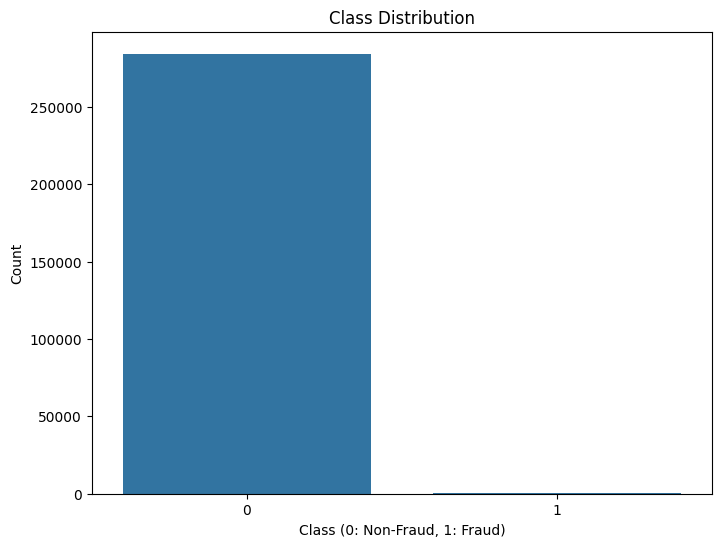

In [34]:
# Analyze class distribution
analyze_class_distribution(creditcard, class_col='Class')

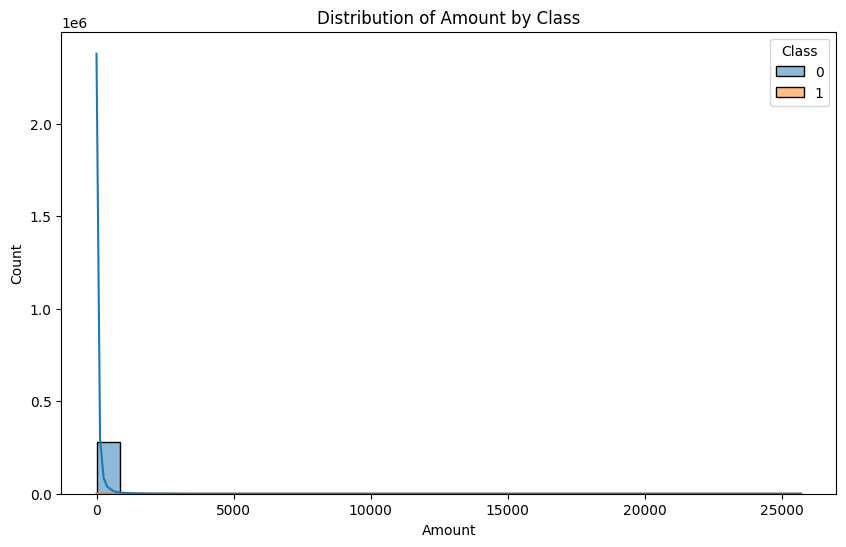

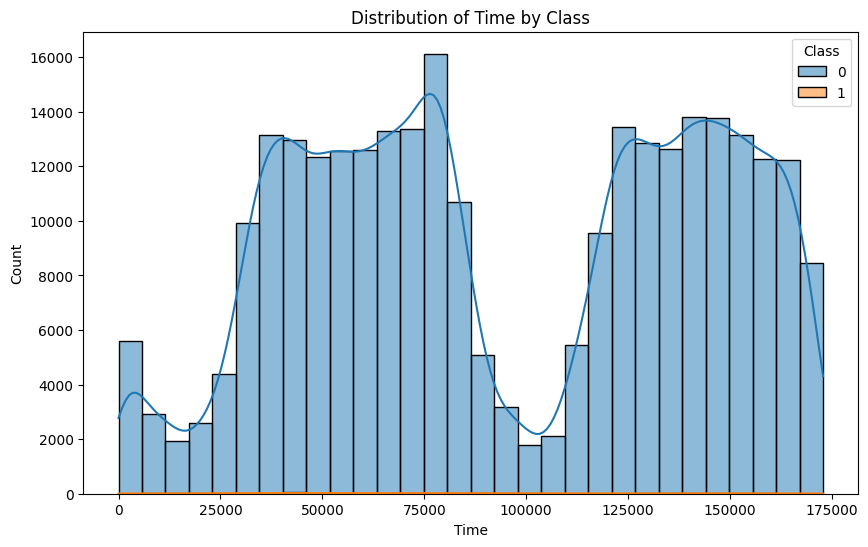

In [35]:
# Plot numerical distributions
cc_numerical_cols = ['Amount', 'Time']
plot_numerical_distributions(creditcard, cc_numerical_cols, class_col='Class')

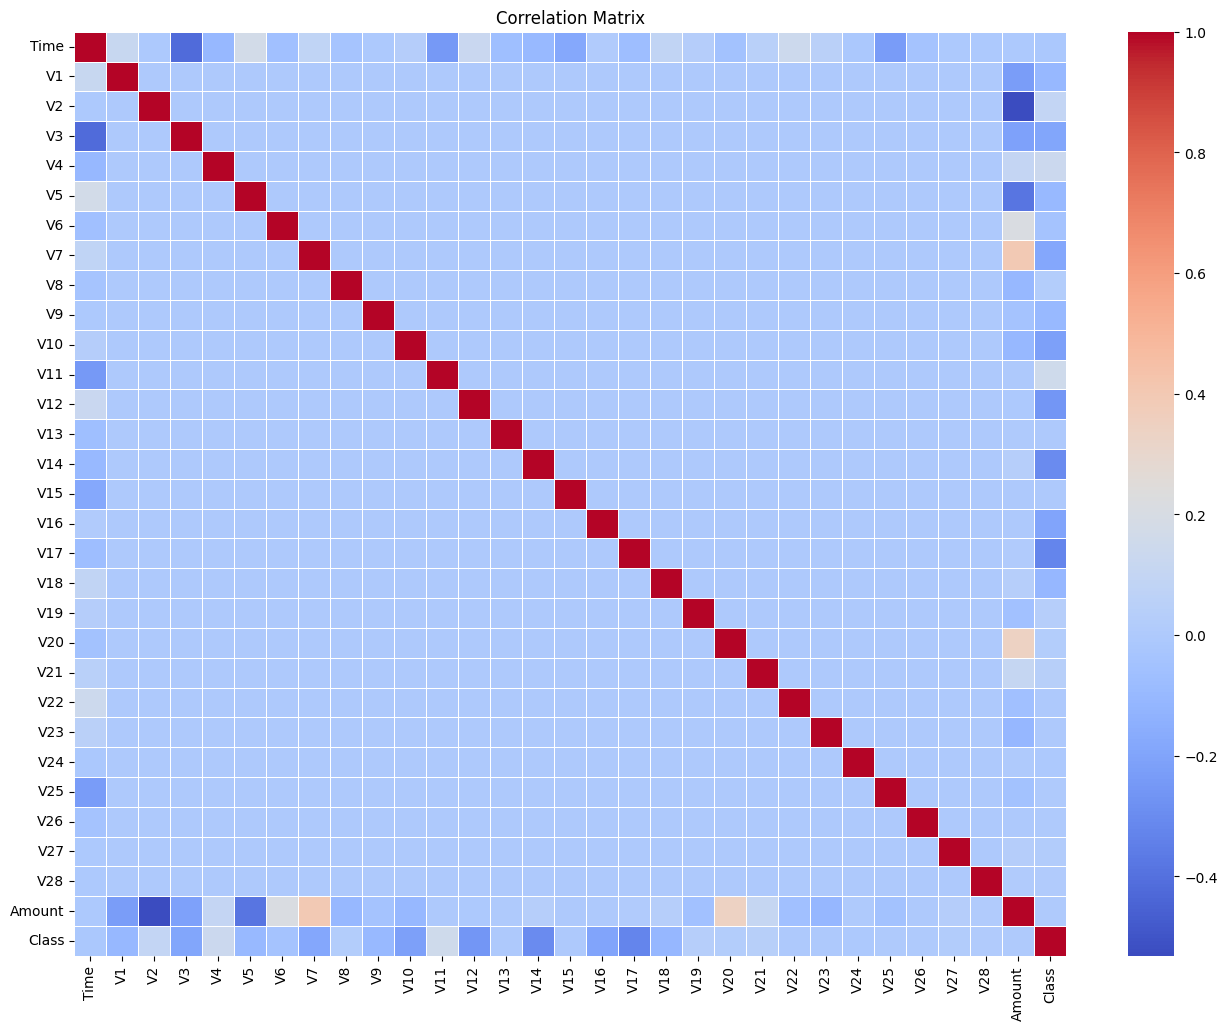

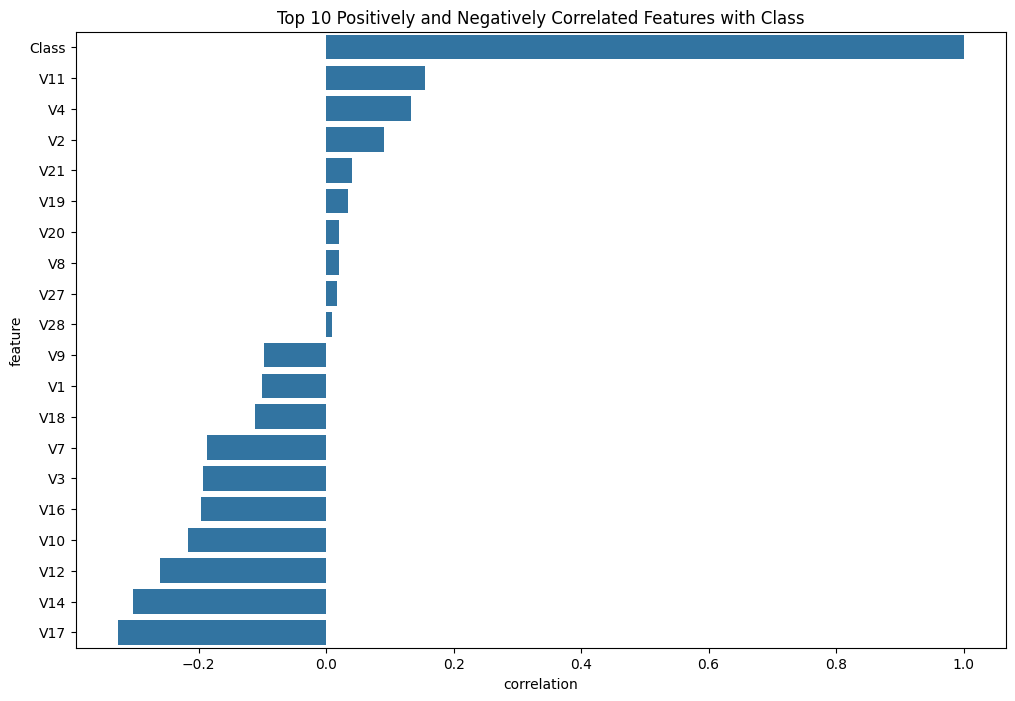

In [36]:
# Analyze correlation matrix and feature importance
target_corr = analyze_correlation_matrix(creditcard, target_col='Class')

In [37]:
# Display top features by correlation with target
print("Top 10 features positively correlated with fraud:")
display(target_corr.head(10))

print("\nTop 10 features negatively correlated with fraud:")
display(target_corr.tail(10))

Top 10 features positively correlated with fraud:


,feature,correlation
30,Class,1.00
11,V11,0.15
4,V4,0.13
2,V2,0.09
21,V21,0.04
19,V19,0.03
20,V20,0.02
8,V8,0.02
27,V27,0.02
28,V28,0.01



Top 10 features negatively correlated with fraud:


,feature,correlation
9,V9,-0.10
1,V1,-0.10
18,V18,-0.11
7,V7,-0.19
3,V3,-0.19
16,V16,-0.20
10,V10,-0.22
12,V12,-0.26
14,V14,-0.30
17,V17,-0.33


## 5. Summary of Findings

#### Fraud Dataset
- The dataset contains 151,112 records with 11 columns, including user demographics, purchase details, and a binary fraud label (`class`).
- Class distribution is highly imbalanced: ~9.4% fraud, ~90.6% non-fraud.
- Numerical features (`purchase_value`, `age`, etc.) show different distributions for fraud and non-fraud cases.
- Categorical features (`source`, `browser`, `sex`) have varying fraud rates:
     - Some sources and browsers are associated with higher fraud rates.
     - Males and females are both present, with no extreme imbalance.
- Time-based analysis:
     - Fraudulent purchases tend to occur closer to signup time.
     - Certain hours of the day and days of the week show higher fraud rates.

#### B. IP-to-Country Mapping
- The IP-country mapping file is complete (no missing values).
- IP address ranges are well distributed across countries.

#### C. Credit Card Fraud Dataset
- The dataset contains 284,807 transactions with 31 columns (PCA components, `Amount`, `Time`, and `Class`).
- Class distribution is extremely imbalanced: only 0.17% of transactions are fraud.
- Numerical features (`Amount`, `Time`) show different distributions for fraud and non-fraud.
- Correlation analysis:
    - Features most positively correlated with fraud: `V11`, `V4`, `V2`, `V21`, etc.
    - Features most negatively correlated with fraud: `V17`, `V14`, `V12`, `V10`, etc.
    - The absolute correlations are generally low, indicating the challenge of distinguishing fraud based on individual features.

#### General Observations
- Both datasets are highly imbalanced, requiring special handling for modeling.
- Fraudulent behavior shows distinct patterns in time, source, and some feature combinations.
- Feature engineering and advanced modeling will be necessary to improve fraud detection performance.
